The following is a demo of a feedback delay network, such as described here: 
https://www.music.mcgill.ca/~gary/307/week3/node18.html

In [1]:
# -*- coding: utf-8 -*-
"""
@author: BlankAdventure
"""

# Load our packages

import matplotlib.pyplot as plt
import numpy as np
from fdn import FDN, input_seq, get_matrix

Simple example - an FDN with a single 3-sample delay and unitiary mixing matrix

Text(0.5, 1.0, 'Impulse Response (D=3)')

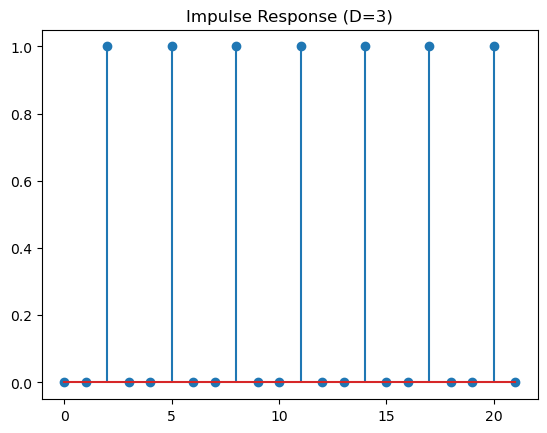

In [4]:
# Basic example of a single 3-sample delay
delays = [3]
fdn = FDN(delays, None, pass_through=False)
y = [fdn.tick(i) for i in input_seq(22)]
plt.stem(y)
plt.title('Impulse Response (D=3)')

Next lets do something more interesting. We'll load an actual audio clip (a clap sound) and pass it through a more complicated FDN.


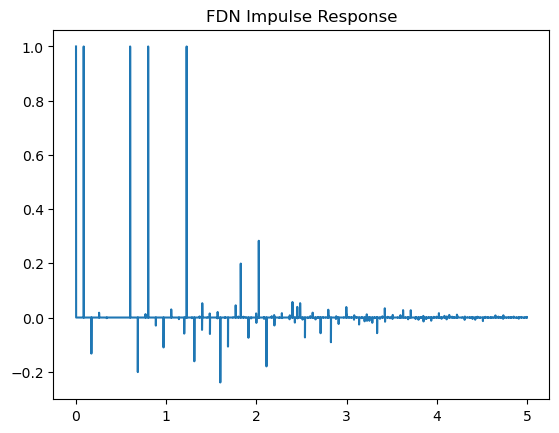

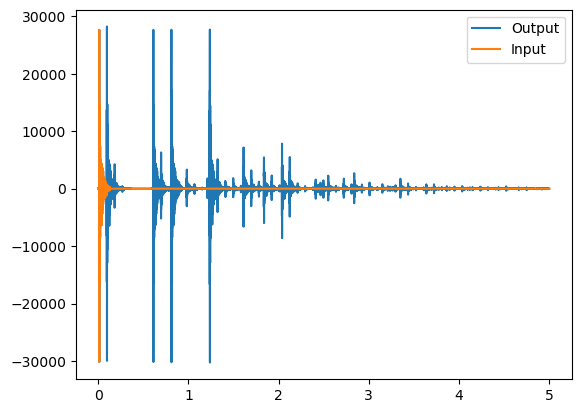

In [9]:
from scipy.io.wavfile import read
import sounddevice as sd

# Load the audio file
fs,y = read("clap.wav")
y = y[4200:10000]; y = y[:,0] #Trim it, and use only one channel
L = 5*fs #Make our input vector a few seconds longer to account for the reverbs
xi = np.zeros(L)
xi[0:len(y)] = y #stuff the audio into the vector
t = np.arange(0,len(xi))*(1/fs)

# Specify our delays in *sample counts*
dels = [3760, 26460, 35280, 54100]

# Get a random scattering matrix. The 0.4 term makes sure it decays 
smat = get_matrix(len(dels),'random') * 0.4

# We generate two FDN objects: one to pass our signal through, and one to 
# use for showing the impulse response (the FDN is stateful so we can't use one
# for both!)
fdn1 = FDN(dels, smat, pass_through=True)
fdn2 = FDN(dels, smat, pass_through=True)

# Pass an impulse through the FDN to get its impulse response. Notice the
# pass-through unit spike, and the unit spikes at the 4 specified delays.
yi = [fdn1.tick(i) for i in input_seq(len(xi))] 
plt.figure()
plt.plot(t,yi)
plt.title('FDN Impulse Response')

# Pass our audio signal into the FDN
yo = [fdn2.tick(i) for i in xi] 
yo = np.asarray(yo,dtype='int16')

plt.figure()
plt.plot(t,yo,label='Output')
plt.plot(t,xi,label='Input')
plt.legend()

In [11]:
# Play it!
sd.play(yo, fs)